In [29]:
import pandas as pd
import numpy as np

import altair as alt
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, MissingIndicator
import fancyimpute as fimp

import datetime
from meteostat import Point, Hourly, Daily

#from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('cneos_fireball_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peak Brightness Date/Time (UT)       929 non-null    object 
 1   Latitude (deg.)                      739 non-null    object 
 2   Longitude (deg.)                     739 non-null    object 
 3   Altitude (km)                        471 non-null    float64
 4   Velocity (km/s)                      276 non-null    float64
 5   vx                                   276 non-null    float64
 6   vy                                   276 non-null    float64
 7   vz                                   276 non-null    float64
 8   Total Radiated Energy (J)            929 non-null    float64
 9   Calculated Total Impact Energy (kt)  929 non-null    float64
dtypes: float64(7), object(3)
memory usage: 72.7+ KB


In [3]:
# ProfileReport(df, title='Fireball Report').to_file('load_report.html')

In [4]:
# Apply imputation


In [5]:
# splitting date and time
df['Peak Brightness Date/Time (UT)']= pd.to_datetime(df['Peak Brightness Date/Time (UT)'])

df['date'] = pd.to_datetime(df['Peak Brightness Date/Time (UT)'].dt.date)
df['year'] = df['Peak Brightness Date/Time (UT)'].dt.year
df['quarter'] = df['Peak Brightness Date/Time (UT)'].dt.quarter
df['month'] = df['Peak Brightness Date/Time (UT)'].dt.month
df['day'] = df['Peak Brightness Date/Time (UT)'].dt.day
df['weekday'] = df['Peak Brightness Date/Time (UT)'].dt.weekday
#df['time'] = df['Peak Brightness Date/Time (UT)'].dt.time
df['hour'] = df['Peak Brightness Date/Time (UT)'].dt.hour
df['minute'] = df['Peak Brightness Date/Time (UT)'].dt.minute
df['second'] = df['Peak Brightness Date/Time (UT)'].dt.second
# df['delta'] = (df['Peak Brightness Date/Time (UT)']-df['Peak Brightness Date/Time (UT)'].shift()).fillna(pd.to_datetime("00:00:00"))

In [6]:
# changing latitude and longitude to values
def lat(row):
    if row['Latitude (deg.)'] == row['Latitude (deg.)']:
        if row['Latitude (deg.)'][-1] == 'N':
            return float(row['Latitude (deg.)'][:-1])
        elif row['Latitude (deg.)'][-1] == 'S':
            return float('-'+(row['Latitude (deg.)'][:-1]))
    return np.nan

def long(row):
    if row['Longitude (deg.)'] == row['Longitude (deg.)']:
        if row['Longitude (deg.)'][-1] == 'E':
            return float(row['Longitude (deg.)'][:-1])
        elif row['Longitude (deg.)'][-1] == 'W':
            return float('-'+(row['Longitude (deg.)'][:-1]))
    return np.nan

df['Lat'] = df.apply(lambda row: lat(row), axis=1)
df['Long'] = df.apply(lambda row: long(row), axis=1)

In [7]:
#getting climate data
start = datetime.datetime(2021,2,9)
end = datetime.datetime(2021,2,10)
Daily(Point(75.8, -92.8, 31000), start, end).fetch()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Peak Brightness Date/Time (UT)       929 non-null    datetime64[ns]
 1   Latitude (deg.)                      739 non-null    object        
 2   Longitude (deg.)                     739 non-null    object        
 3   Altitude (km)                        471 non-null    float64       
 4   Velocity (km/s)                      276 non-null    float64       
 5   vx                                   276 non-null    float64       
 6   vy                                   276 non-null    float64       
 7   vz                                   276 non-null    float64       
 8   Total Radiated Energy (J)            929 non-null    float64       
 9   Calculated Total Impact Energy (kt)  929 non-null    float64       
 10  date          

In [9]:
# ProfileReport(df, title='Fireball Report').to_file('fireball_report.html')

In [79]:
selection = alt.selection(type='interval', encodings=['x'])

base = alt.Chart().mark_bar().encode(
    x=alt.X(alt.repeat('column'), type='quantitative'),
    y=alt.Y(aggregate='count', type='quantitative')
).properties(
    width=225,
    height=130
)
    
# gray background with selection
background = base.encode(
    color=alt.value('#ddd')
).add_selection(selection)

# blue highlights on the transformed data
highlight = base.transform_filter(selection)

line = alt.Chart().mark_rule(color='firebrick').encode(
    x=alt.X(alt.repeat('column'), aggregate='mean', type='quantitative'),
    size=alt.SizeValue(3)
).transform_filter(selection)

# layer the three charts & repeat
group_chrt = alt.layer(
    background,
    highlight,
    line,
    data=df
)

alt.vconcat(
    group_chrt.repeat(column=["year", "quarter", "month"]),
    group_chrt.repeat(column=["day", "weekday"]),
    group_chrt.repeat(column=["hour", "minute", "second"])
)

alt.VConcatChart(...)

In [11]:
df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),...,year,quarter,month,day,weekday,hour,minute,second,Lat,Long
0,2022-08-21 16:35:49,6.3S,51.5E,37.0,NaN,NaN,NaN,NaN,2.100000e+10,0.076,...,2022,3,8,21,6,16,35,49,-6.3,51.5
1,2022-08-14 07:39:18,35.0S,78.4E,55.5,NaN,NaN,NaN,NaN,4.680000e+11,1.200,...,2022,3,8,14,6,7,39,18,-35.0,78.4
2,2022-07-28 01:36:08,6.0S,86.9W,37.5,29.9,-17.1,23.5,-7.2,2.510000e+11,0.680,...,2022,3,7,28,3,1,36,8,-6.0,-86.9
3,2022-07-27 04:41:30,44.8S,2.9W,38.1,19.8,-6.1,17.7,6.5,5.240000e+11,1.300,...,2022,3,7,27,2,4,41,30,-44.8,-2.9
4,2022-07-25 07:28:17,40.5S,76.6E,33.6,15.2,-2.1,-2.2,14.9,8.700000e+10,0.270,...,2022,3,7,25,0,7,28,17,-40.5,76.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,...,1993,4,11,29,0,17,48,41,26.5,78.3
925,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,...,1993,4,10,31,6,3,39,27,51.3,-100.9
926,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,...,1991,4,10,4,4,9,22,47,78.7,6.3
927,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,...,1990,4,10,1,0,3,51,47,7.5,142.8


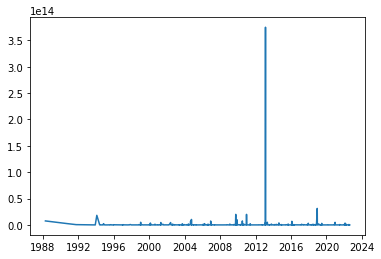

In [60]:
plt.plot(df['Peak Brightness Date/Time (UT)'], df['Total Radiated Energy (J)'])

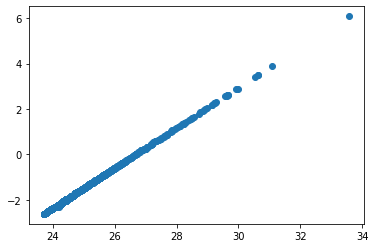

In [64]:
plt.scatter(np.log(df['Total Radiated Energy (J)']), np.log(df['Calculated Total Impact Energy (kt)']))

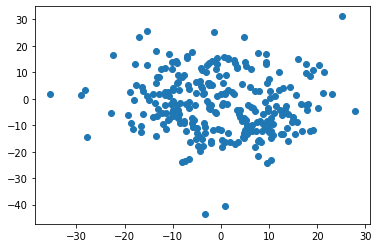

In [55]:
plt.scatter(df['vx'], df['vy'])

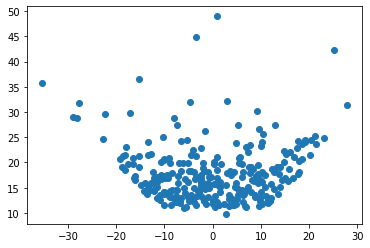

In [57]:
plt.scatter(df['vx'], df['Velocity (km/s)'])

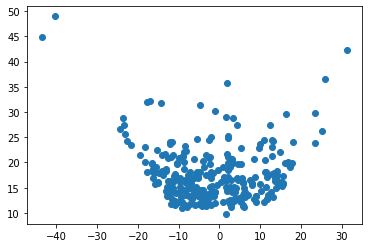

In [56]:
plt.scatter(df['vy'], df['Velocity (km/s)'])

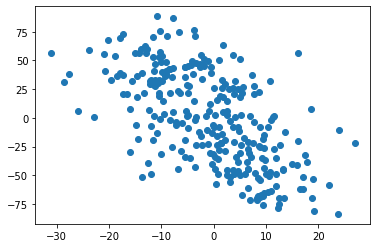

In [50]:
plt.scatter(df['vz'], df['Lat'])

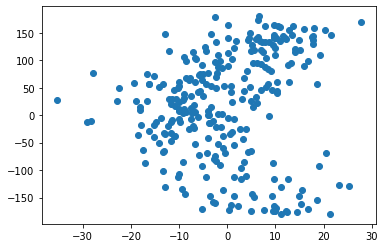

In [51]:
plt.scatter(df['vx'], df['Long'])

In [66]:
df = df[::-1]

In [76]:
delta = (df['Peak Brightness Date/Time (UT)']-df['Peak Brightness Date/Time (UT)'].shift()).fillna(pd.Timedelta('0 days'))

In [77]:
delta

928     0 days 00:00:00
927   899 days 00:48:37
926   368 days 05:31:00
925   757 days 18:16:40
924    29 days 14:09:14
             ...       
4       3 days 07:11:58
3       1 days 21:13:13
2       0 days 20:54:38
1      17 days 06:03:10
0       7 days 08:56:31
Name: Peak Brightness Date/Time (UT), Length: 929, dtype: timedelta64[ns]

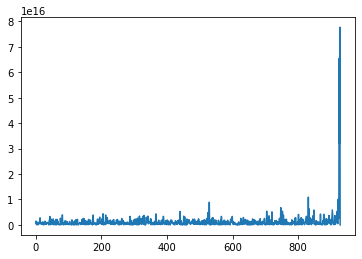

In [85]:
plt.plot(delta)